# OCR Skeleton Demo
Демонстрация всех моделей: CRAFT, DBNet, CRNN, ViTSTR

In [2]:
from ocr_skel import Registry, OCRPipeline

print('Detectors:', Registry.list_detectors())
print('Recognizers:', Registry.list_recognizers())

Detectors: ['craft', 'dbnet']
Recognizers: ['crnn', 'vitstr']


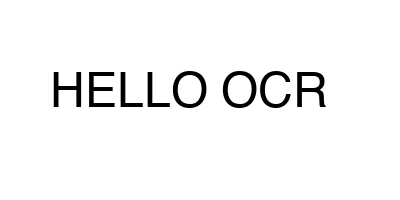

In [3]:
# Создаём тестовое изображение
from PIL import Image, ImageDraw, ImageFont

img = Image.new('RGB', (400, 200), color='white')
draw = ImageDraw.Draw(img)
try:
    font = ImageFont.truetype("/System/Library/Fonts/Helvetica.ttc", 48)
except:
    font = ImageFont.load_default()

draw.text((50, 70), "HELLO OCR", fill='black', font=font)
img.save('demo_image.png')
img

## CRAFT + CRNN (default)

In [5]:
pipeline_craft_crnn = OCRPipeline(
    detector_name='craft',
    recognizer_name='crnn',
    detector_kwargs={'gpu': False},
    recognizer_kwargs={'gpu': False}
)
results = pipeline_craft_crnn.process_image('demo_image.png')
for r in results:
    print(f"CRAFT+CRNN: '{r['text']}' (conf: {r['confidence']:.2%})")

Loaded CRAFT weights from /Users/david/little-beetle/ocr_skel/weights/craft_mlt_25k.pth
Loaded CRNN weights from /Users/david/little-beetle/ocr_skel/weights/crnn.pth
CRAFT+CRNN: '0o0' (conf: 37.52%)


## DBNet + CRNN

In [7]:
pipeline_dbnet_crnn = OCRPipeline(
    detector_name='dbnet',
    recognizer_name='crnn',
    detector_kwargs={'gpu': False},
    recognizer_kwargs={'gpu': False}
)
results = pipeline_dbnet_crnn.process_image('demo_image.png')
for r in results:
    print(f"DBNet+CRNN: '{r['text']}' (conf: {r['confidence']:.2%})")

Loaded DBNet weights from /Users/david/little-beetle/ocr_skel/weights/dbnet_resnet18.pth
Loaded CRNN weights from /Users/david/little-beetle/ocr_skel/weights/crnn.pth
DBNet+CRNN: '0' (conf: 29.16%)


## CRAFT + ViTSTR

In [9]:
pipeline_craft_vitstr = OCRPipeline(
    detector_name='craft',
    recognizer_name='vitstr',
    detector_kwargs={'gpu': False},
    recognizer_kwargs={'gpu': False}
)
results = pipeline_craft_vitstr.process_image('demo_image.png')
for r in results:
    print(f"CRAFT+ViTSTR: '{r['text']}' (conf: {r['confidence']:.2%})")

Loaded CRAFT weights from /Users/david/little-beetle/ocr_skel/weights/craft_mlt_25k.pth
Loaded ViTSTR weights from /Users/david/little-beetle/ocr_skel/weights/vitstr_small.pth
CRAFT+ViTSTR: 'fcfcfcfcfcfcfcfcfcfwctcfr9fcfwctcfcfcfcfcfcfcfcfcfcfcfc' (conf: 5.13%)


## DBNet + ViTSTR

In [11]:
pipeline_dbnet_vitstr = OCRPipeline(
    detector_name='dbnet',
    recognizer_name='vitstr',
    detector_kwargs={'gpu': False},
    recognizer_kwargs={'gpu': False}
)
results = pipeline_dbnet_vitstr.process_image('demo_image.png')
for r in results:
    print(f"DBNet+ViTSTR: '{r['text']}' (conf: {r['confidence']:.2%})")

Loaded DBNet weights from /Users/david/little-beetle/ocr_skel/weights/dbnet_resnet18.pth
Loaded ViTSTR weights from /Users/david/little-beetle/ocr_skel/weights/vitstr_small.pth
DBNet+ViTSTR: 'fcfcfcfcfcfcfcfcfwcfrfcfwcfcfcfcfcfcfcfcfcfc' (conf: 5.13%)


## Визуализация

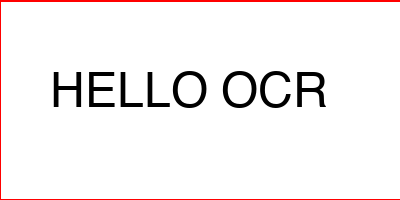

In [13]:
from PIL import ImageDraw

results = pipeline_craft_crnn.process_image('demo_image.png')

img_result = Image.open('demo_image.png')
draw = ImageDraw.Draw(img_result)

for r in results:
    quad = r['quad']
    points = [tuple(p) for p in quad] + [tuple(quad[0])]
    draw.line(points, fill='red', width=2)
    draw.text((quad[0][0], quad[0][1] - 15), r['text'], fill='red')

img_result